In [31]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [32]:
img = plt.imread('image_with_edges.png')

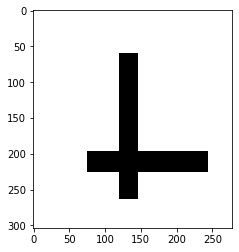

In [33]:
plt.imshow(img)

# Define vertical and horizontal Sobel Filters

In [34]:
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

In [35]:
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

In [36]:
n,m,d = img.shape

# Apply vertical Filter

In [37]:
vertical_edges_img = np.zeros_like(img)

In [38]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        transformed_pixels = vertical_filter*local_pixels
        vertical_score = (transformed_pixels.sum() + 4)/8
        vertical_edges_img[row, col] = [vertical_score]*3

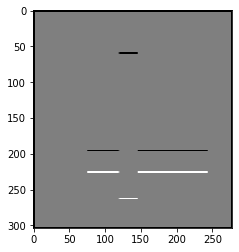

In [39]:
plt.imshow(vertical_edges_img)

# Apply horizontal Filter

In [40]:
horizontal_edges_img = np.zeros_like(img)

In [41]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = (transformed_pixels.sum() + 4)/8
        horizontal_edges_img[row, col] = [horizontal_score]*3

In [42]:
horizontal_edges_img[170,224]

array([0.5, 0.5, 0.5], dtype=float32)

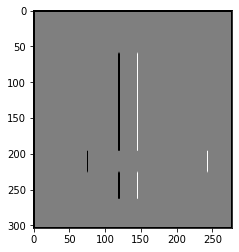

In [43]:
plt.imshow(horizontal_edges_img)

# Apply Both

In [44]:
edges_img = np.zeros_like(img)

In [45]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        edges_img[row, col] = [edge_score]*3
edges_img = edges_img/edges_img.max()

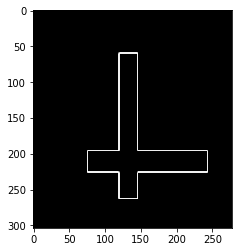

In [46]:
plt.imshow(edges_img)

# Let's try on a more complex image

In [47]:
img = plt.imread('mouse.jpg')

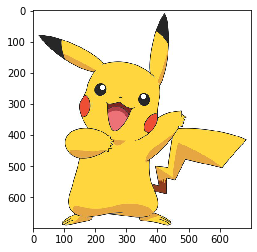

In [48]:
plt.imshow(img)

In [49]:
greyImg = img.mean(axis=2, keepdims=True)/255.0
greyImg = np.concatenate([greyImg]*3, axis=2)

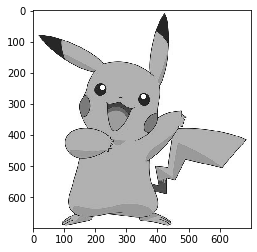

In [50]:
plt.imshow(greyImg)

In [51]:
edges_img = np.zeros_like(greyImg)

In [52]:
n,m,d = greyImg.shape

In [53]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = greyImg[row-1:row+2, col-1:col+2, 0]
        
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        edges_img[row, col] = [edge_score]*3
edges_img = edges_img/edges_img.max()

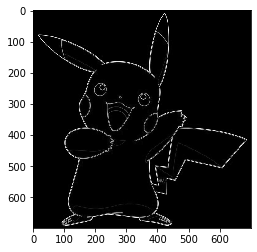

In [54]:
plt.imshow(edges_img)

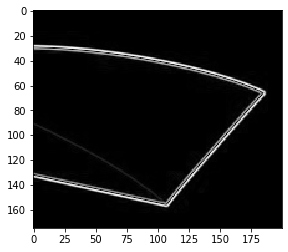

In [55]:
plt.imshow(edges_img[350:525, 500:])